<a href="https://colab.research.google.com/github/Nayeong127/class2021Spring/blob/main/%EA%B8%B0%EB%A7%90_%EA%B3%B5%EB%B6%80_%EC%99%84%EC%A0%84_%EB%B6%80%EC%88%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter
#필요한 패키지임

# Phasor

저 파란색 점점점 무언가/ 2차원, 3차원도 가능

모음을 만들기 위해!!pure tone(싸인웨이브)을 만들어서 source만들거야

1. time 2, phase, 3. sine(phase), 4, plot(x-time,y-sin)

In [3]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz

#amplitude는 진폭. 싸인웨이브나 사운드웨이브에서 볼 수 있는 웨이브 크기 같은 거!
#sr:sampling rate: 점들이 1초에 몇 개의 샘플이 들어갈 것인가~ 단위 Hz
#duration: 얼만큼 긴 싸인 웨이브를 만들건가~ 0.5초 짜리~
#frequency는 반복되는 단위를 싸이클이라고 하는데, 1초에 싸이클이 몇 개 들어가게 할까? -> 소리의 높낮이
#Hz 단위는 1초에 몇 개 들어가는가~ 니까 샘플링 레잍, 프리퀜시 모두 헤르쯔 쓸 수 있음. 

얘는 4번 반복되니까 freq 4Hz
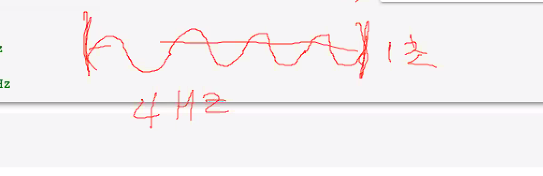

In [4]:
# generate time
t = np.arange(1, sr * dur+1)/sr

#그 다음으로 할 건 시간을 만드는 거야. 
#싸인웨이브는 시간의 개념이 없어서 
#각도값(phase)와 시간을 sync시켜야해.
#sr있어야 시간을 만들 수 있어. sr 자체가 시간을 몇 개로 만들 것인가~를 말해주는 것!
#np.arange(0,10) 하면 (0,1,2,3,4,...9)이니까
# np.arange(1, sr * dur+1)는1에서 sr * dur+1 전까지 만들어냄.
#여기선 sr 만이고 dur 0.5니까 np.arange(1, sr * dur+1)/sr는 1부터5001이넹?! -> [1,2,...5000]/10000
#[1/10000,2/10000,...,5000/10000]저걸 하면 마지막껀 0.5초
#이거 중요해~~~~

#시간을 만드는 건 샘플링레잍을 설정한다!
#설정하고 t=[0.0001,0.0002,..]이렇게 만들어서 식을 만든거야

시간과 phase 싱크시키는 거~
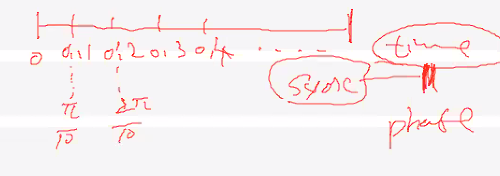

In [19]:
# generate phase
theta = t * 2*np.pi * freq   
#phase(각도 in radian) 
#위에서 시간을 만들었지. 
#1초*2파이 하면 한 바퀴 짜리 사인 웨이브 만든 거임. 사진 참고해
#1초*2파이*100(frequency) 하면 이 바퀴만큼 도는 phase임!!
#2*np.pi 이게 2파이 쓰는 거
#시간과 phase가 모두 t로 연결되어 있어 그러니까

바퀴, 라디안, 각도

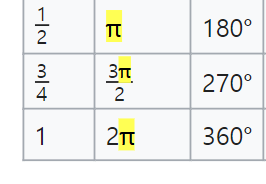

1초*2파이 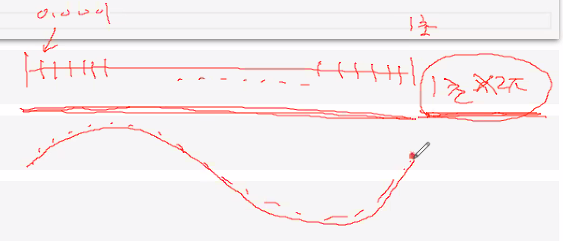

In [20]:
# generate signal by cosine-phasor
s = amp * np.sin(theta)

#싸인웨이브 만들 때 싸인이라는 함수 쓸 거야. 여기에 radian 값이 들어가(각도값)
#in radian!! 레이디안 형태로 바꿔야해//// 2파이=360, 파이=180, 0=0
#np.sin 함수가 싸인 함수임~

# **잠시 여긴 0428의 필기임**



In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter

In [7]:
theta=np.pi #얘 지금 180이다
np.sin(theta)

1.2246467991473532e-16

1.2246467991473532e-16
-16은 유효숫자. 0.000000000012라는 뜻~


In [8]:
theta=np.pi/6 #얘 지금 30도다
np.sin(theta)

0.49999999999999994

In [9]:
theta=np.pi*0 #얘 지금 0이다
np.sin(theta)

0.0

i 대신 1j라고 쓰는 거임~

e와 i는 상수/// e는 2.71.... i는 복소수

고로 e^쎄타i는 항상 복소수!!! a+bi꼴로 나타낼 수 있지.

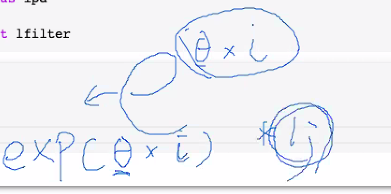

In [15]:
theta=np.pi*0
np.exp(theta*1j)

(1+0j)

이거 찍으면 (1,0)

In [16]:
theta=np.pi/2
np.exp(theta*1j)

(6.123233995736766e-17+1j)

In [12]:
theta=np.pi
np.exp(theta*1j)

(-1+1.2246467991473532e-16j)

-1,0i
->(-1,0)

In [13]:
theta=np.pi*3/2
np.exp(theta*1j)

(-1.8369701987210297e-16-1j)

0-i
(0,-1)

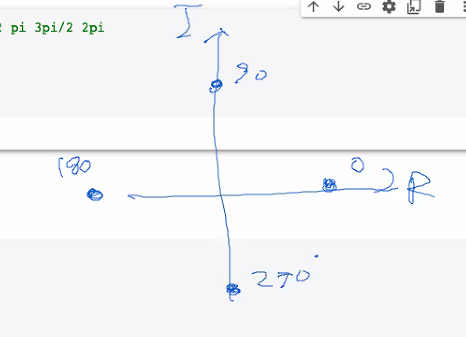


규칙성이 있다. 이걸 다 이으면 동그라미가 될듯?!
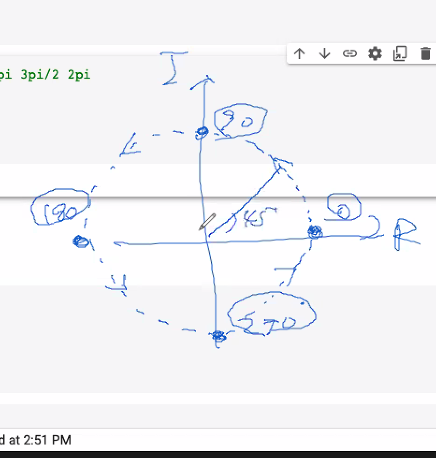

이건 0503

허수 부분이 0이면 수직선~ 0 아니면 2차원 그래프 가능!

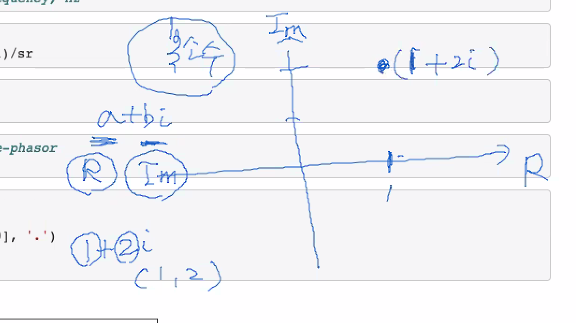

# **다시 돌아와**

Text(0, 0.5, 'real')

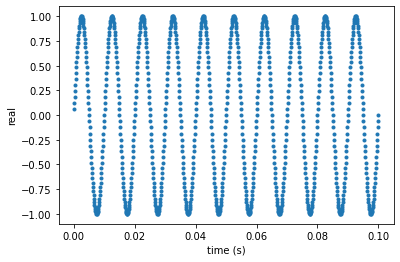

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

#plt는 matplotlib의 pyplot이공
#figure 함수 이용해서 그래프
#plot 함수는 x,y에 들어올 값들 적으면 됩니다.
#x=[1,2,3]이고 y가 [-1,0,1]이면 (1,-1), (2,0) (3,1) 으로 점 찍는 거임
#여기선 시간이 엑스축(phase 아님!!!!!!!!!!!!!)
#plot(t,s)의 여기서 t의 sample 개수는?! 5000. 1초 동안은?! 10000개.

Text(0, 0.5, 'real')

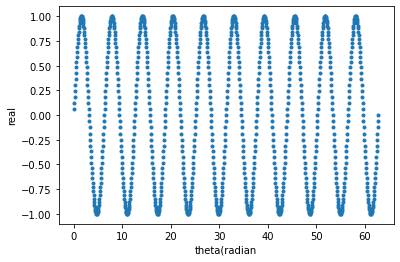

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta[0:1000], s[0:1000], '.')
ax.set_xlabel('theta(radian')
ax.set_ylabel('real')
#x축을 theta로 해서 값이 크죠. 초 단위가 아니라 radian 단위라서

Text(0, 0.5, 'real')

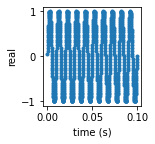

In [27]:
fig = plt.figure()
ax = fig.add_subplot(235)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
#subplot바꾸니까 작아짐!235하면 2 by 3중 5번째
#111하면 저렇게 됨

ValueError: ignored

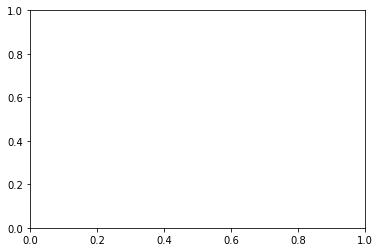

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1001], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
#plot 뒤에 두 숫자 다르면 오류

In [29]:
ipd.Audio(s, rate=sr)

#얘로 소리 듣기~
#최종 s와 sr 써주면 됨~
#뭐 바꾸고 싶으면 위에꺼 (그림 그리는 거 빼고) 다시 실행해야함!!!

In [30]:
#phasor 함수 만들기
def phasor(amp,sr,dur,freq):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  s = np.sin(theta)
  return(s,theta,t)

In [31]:
phasor(1,10000,0.5,100)

(array([ 6.27905195e-02,  1.25333234e-01,  1.87381315e-01, ...,
        -1.25333234e-01, -6.27905195e-02,  1.96438672e-15]),
 array([6.28318531e-02, 1.25663706e-01, 1.88495559e-01, ...,
        3.14033602e+02, 3.14096434e+02, 3.14159265e+02]),
 array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
        5.000e-01]))

In [23]:
# generate signal by complex-phasor
c = amp * np.exp(theta*1j)

Text(0.5, 0, 'imag')

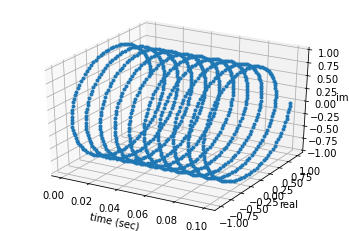

In [ ]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (sec)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [ ]:
import plotly.graph_objects as go
import numpy as np

x, y, z = t[0:200], c.real[0:200], c.imag[0:200]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
ipd.Audio(c.imag, rate=sr)

In [ ]:
def phasor_sine(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  s = amp * np.sin(theta)

  return s, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440
s, t, theta = phasor_sine(amp, sr, dur, freq)
ipd.Audio(s, rate=sr)

In [ ]:
def phasor_complex(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  c = amp * np.exp(theta*1j)

  return c, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.imag, rate=sr)

# Generate pulse train (=source)

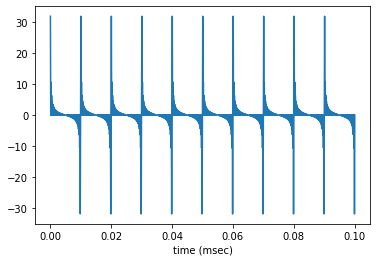

In [ ]:
# parameter setting
amp = 1
sr = 10000
dur = 0.5

F0 = 100
Fend = int(sr/2)  

s_all = 0
for freq in range(F0, Fend+1, F0):
  s, t, theta = phasor_sine(amp, sr, dur, freq)
  s_all += s

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s_all[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s_all, rate=sr)

# Filter source

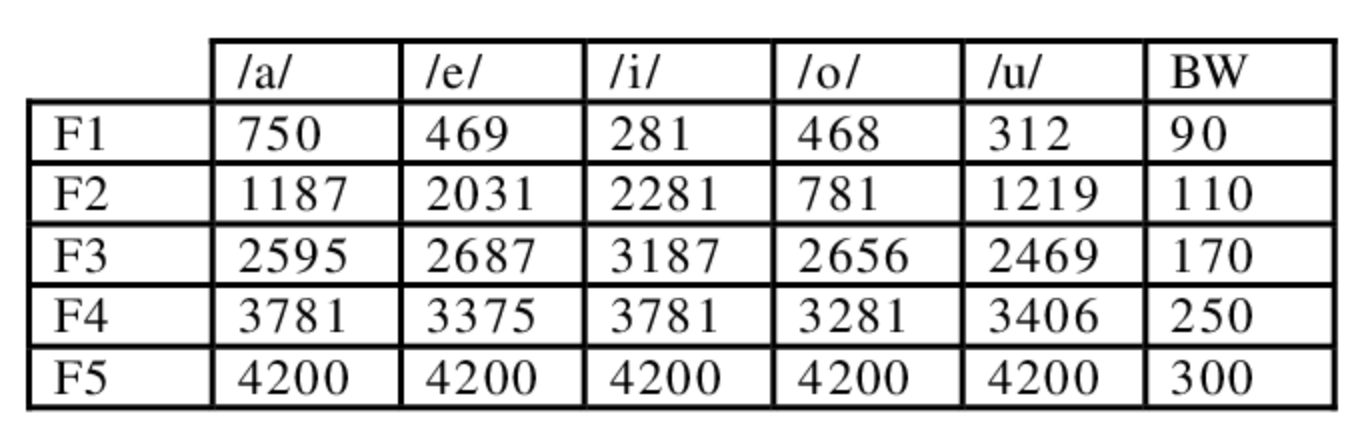

In [ ]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [ ]:
s = s_all

In [ ]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 750  # RG is the frequency of the 1st Formant
BWG = 90  # BWG is the bandwidth of the 1st Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 1187  # RG is the frequency of the 2nd Formant
BWG = 110  # BWG is the bandwidth of the 2nd Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 2595  # RG is the frequency of the 3rd Formant
BWG = 170  # BWG is the bandwidth of the 3rd Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 3781  # RG is the frequency of the 4th Formant
BWG = 250  # BWG is the bandwidth of the 4th Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

# load wav

In [ ]:
from google.colab import files
!rm *.wav
tmp = files.upload()
fn = list(tmp)[0]

Saving a.wav to a.wav


In [ ]:
from scipy.io import wavfile
sr, s = wavfile.read(fn)
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

In [ ]:
ipd.Audio(s, rate=sr)

Text(0, 0.5, 'amplitude')

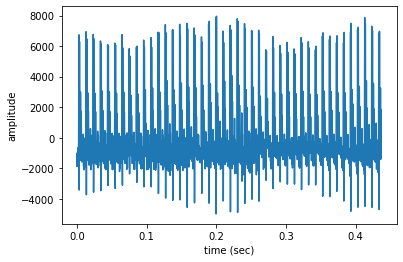

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, s)
ax.set_xlabel('time (sec)')
ax.set_ylabel('amplitude')

# Fourier tranform

In [ ]:
# ignore this!!!
# 
# nFFT = nSamp
# amp = [];
# for n in range(0,nFFT):
#     omega = 2*np.pi*n/nFFT # angular velocity
#     z = np.exp(omega*1j)**(np.arange(0,nSamp))
#     amp.append(np.abs(np.dot(s,z)))

In [ ]:
nFFT = 512
freq = [];
amp = [];
for n in range(1,nFFT+1):
    freq.append(sr*n/nFFT)
    c, t, theta = phasor_complex(1, sr, dur, freq[-1])
    amp.append(np.abs(np.dot(s,c)))

Text(0, 0.5, 'amplitude')

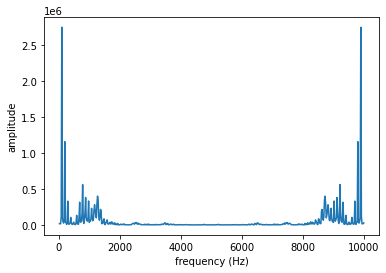

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

# define helper functions

In [ ]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# preprocessing signal

In [ ]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2140e358>)

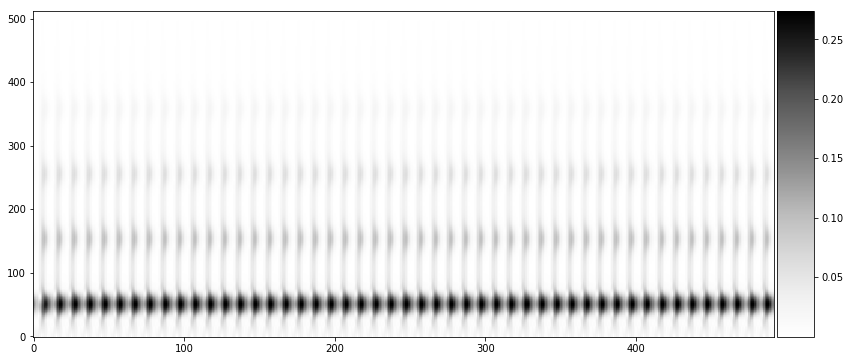

In [ ]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

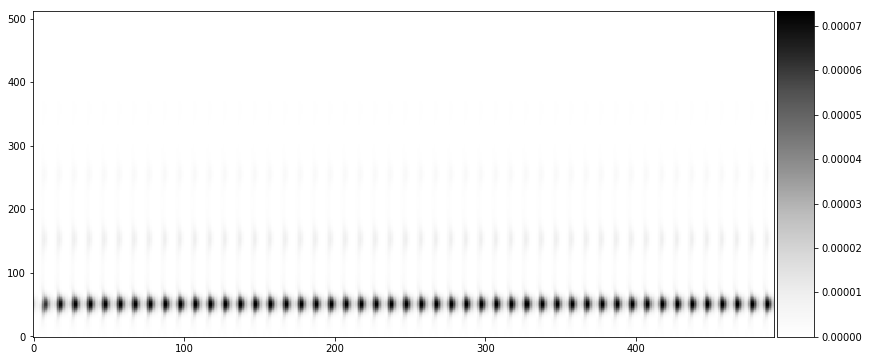

In [ ]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

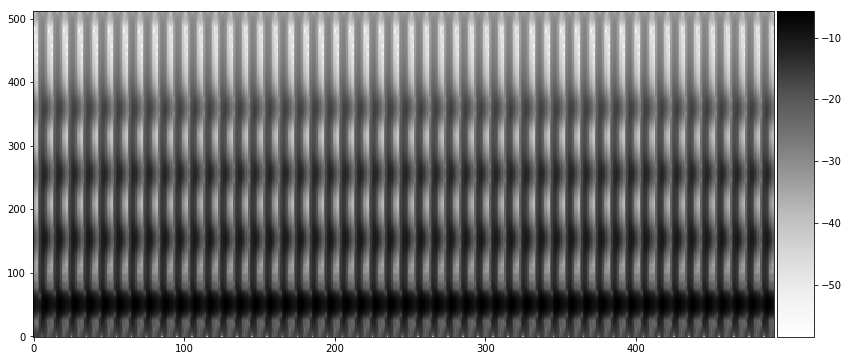

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

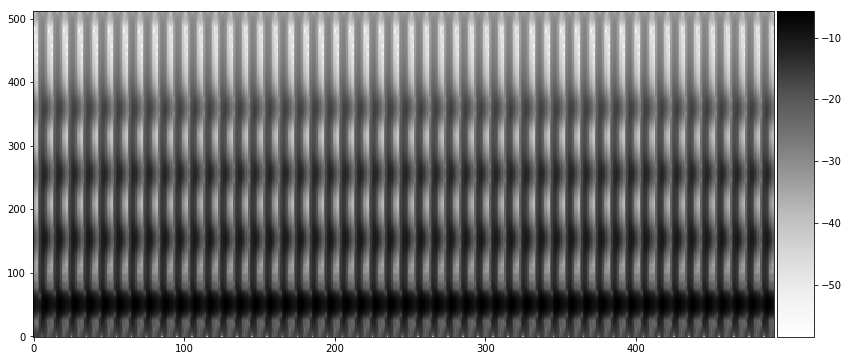

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);